In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.impute import IterativeImputer
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,precision_recall_curve, \
roc_auc_score,roc_curve,recall_score,classification_report, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import OneClassSVM
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedShuffleSplit
from lightgbm import LGBMClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import imblearn
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('../input/iba-ml1-mid-project/train.csv')
df.head(10)

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
0,1,66.0,NaN,4000.0,NaN,1.0,0.569108,0.05488766900000001,0.0,0.0,0.0,0
1,2,61.0,2.0,4000.0,6.0,1.0,0.297176,0.10194991099999999,0.0,0.0,0.0,0
2,3,31.0,2.0,3040.0,8.0,0.0,0.160145,1.22713507,4.0,0.0,0.0,1
3,4,54.0,4.0,10218.0,5.0,0.0,0.067913,0.08327777900000001,0.0,0.0,0.0,0
4,5,29.0,0.0,4468.0,6.0,0.0,0.328261,0.317445504,0.0,0.0,0.0,0
5,6,39.0,2.0,4166.0,17.0,1.0,NaN,NaN,1.0,0.0,0.0,0
6,7,30.0,2.0,4585.0,1.0,0.0,0.087004,0.9999998999999999,1.0,NaN,4.0,0
7,8,NaN,0.0,2916.0,5.0,0.0,0.124100,0.06742675599999999,0.0,0.0,0.0,0
8,9,51.0,2.0,3836.0,9.0,0.0,0.208496,NaN,0.0,0.0,0.0,0
9,10,60.0,0.0,2900.0,5.0,1.0,NaN,NaN,0.0,0.0,0.0,0


In [3]:
df.shape

(72161, 12)

In [4]:
df.columns

Index(['Id', 'age', 'number_dependent_family_members', 'monthly_income',
       'number_of_credit_lines', 'real_estate_loans',
       'ratio_debt_payment_to_income', 'credit_line_utilization',
       'number_of_previous_late_payments_up_to_59_days',
       'number_of_previous_late_payments_up_to_89_days',
       'number_of_previous_late_payments_90_days_or_more',
       'defaulted_on_loan'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72161 entries, 0 to 72160
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Id                                                72161 non-null  int64  
 1   age                                               65017 non-null  float64
 2   number_dependent_family_members                   67945 non-null  float64
 3   monthly_income                                    66145 non-null  float64
 4   number_of_credit_lines                            66007 non-null  float64
 5   real_estate_loans                                 68355 non-null  float64
 6   ratio_debt_payment_to_income                      66553 non-null  float64
 7   credit_line_utilization                           65815 non-null  object 
 8   number_of_previous_late_payments_up_to_59_days    67966 non-null  float64
 9   number_of_previou

### All our columns are numbers except one credit_line_utilization we will check it now

In [6]:
df['credit_line_utilization']

0        0.05488766900000001
1        0.10194991099999999
2                 1.22713507
3        0.08327777900000001
4                0.317445504
                ...         
72156            0.145213501
72157            0.445703733
72158            0.048434473
72159            0.447265776
72160     0.8737087640000001
Name: credit_line_utilization, Length: 72161, dtype: object

### It is interesting that this columns consist of numbers but dtype is object we will convert it to float

In [7]:
df['credit_line_utilization'].astype(float, errors="raise")

ValueError: could not convert string to float: '1,089820359'

### Hmm, It appears in some rows of this column there are mistypes. *','* is used instead of *'.'* and those rows can not be converted to float, so first we will replace *','* with *'.'*  

In [8]:
df['credit_line_utilization'] = df['credit_line_utilization'].str.replace(',', '.').astype(float)

In [9]:
df['credit_line_utilization']

0        0.054888
1        0.101950
2        1.227135
3        0.083278
4        0.317446
           ...   
72156    0.145214
72157    0.445704
72158    0.048434
72159    0.447266
72160    0.873709
Name: credit_line_utilization, Length: 72161, dtype: float64

### Done!!

### Lets divide target and train columns

In [10]:
# We will not Id columns for prediction so I will exclude it
columns = df.iloc[:, 1:-1].columns
columns

Index(['age', 'number_dependent_family_members', 'monthly_income',
       'number_of_credit_lines', 'real_estate_loans',
       'ratio_debt_payment_to_income', 'credit_line_utilization',
       'number_of_previous_late_payments_up_to_59_days',
       'number_of_previous_late_payments_up_to_89_days',
       'number_of_previous_late_payments_90_days_or_more'],
      dtype='object')

In [11]:
X, y = df[columns], df.iloc[:, -1]

### Let's take a look at the target

In [12]:
Counter(y)

Counter({0: 67148, 1: 5013})

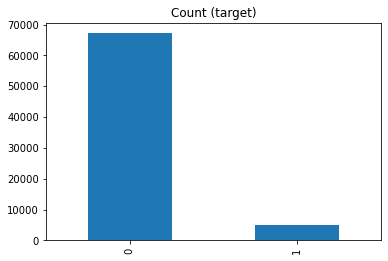

In [13]:
y.value_counts().plot(kind='bar', title='Count (target)');

* ### As we can see our data is imbalanced. We will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.
* ### Once we determine how many instances are loan default (loan default = "1"), we should bring the none loan default to the same amount (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 5013 cases of loan default (loan default = 1)

In [14]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X,y)
Counter(y_rus)

Counter({0: 5013, 1: 5013})

In [15]:
new_df = pd.concat([X_rus, y_rus], axis=1)
new_df

,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
0,58.0,4.0,19525.0,4.0,0.0,NaN,0.207988,0.0,0.0,0.0,0
1,53.0,0.0,3750.0,4.0,2.0,0.288456,0.097986,0.0,0.0,0.0,0
2,39.0,2.0,NaN,9.0,2.0,0.417849,0.073896,0.0,0.0,0.0,0
3,41.0,0.0,7500.0,8.0,2.0,0.444741,NaN,0.0,0.0,0.0,0
4,64.0,0.0,0.0,3.0,0.0,508.000000,0.616341,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
10021,24.0,NaN,NaN,0.0,0.0,0.013540,1.000000,1.0,0.0,3.0,1
10022,45.0,1.0,NaN,8.0,4.0,0.485349,0.073525,0.0,0.0,0.0,1
10023,NaN,0.0,2500.0,4.0,0.0,0.552579,0.465445,0.0,1.0,1.0,1
10024,62.0,0.0,945.0,NaN,0.0,0.707188,NaN,1.0,0.0,0.0,1


### Now there are 5013 1 and 0 in the dataset and this time it is balanced

## Now all our columns are numeric and data is balanced we can start Visualisation and Imputing

### We will first start with imputing and I have 4 techniques I would like to try. I will compare them by predicting
1. SimpleImputer mean
2. SimpleImputer median
3. IterativeImputer
4. KNNImputer

### So let's build our pipeline (We will use RandomForest for this problem)

In [16]:
## SimpleImputer(mean)
sss = StratifiedKFold()
roc = []
for train_idx, test_idx in sss.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    
    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='mean')),
            ]), columns),
        ])),
        ('classifier', RandomForestClassifier())
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict_proba(X_test)
    roc.append(roc_auc_score(y_test, y_predicted[:, 1]))
    
print(np.mean(roc))

0.8357926572519145


In [17]:
## SimpleImputer(median)
sss = StratifiedKFold()
roc = []
for train_idx, test_idx in sss.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    
    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='median')),
            ]), columns),
        ])),
        ('classifier', RandomForestClassifier())
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict_proba(X_test)
    roc.append(roc_auc_score(y_test, y_predicted[:, 1]))
    
print(np.mean(roc))

0.8354680519171476


In [18]:
## IterativeImputer
sss = StratifiedKFold()
roc = []
for train_idx, test_idx in sss.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    
    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', IterativeImputer()),
            ]), columns),
        ])),
        ('classifier', RandomForestClassifier())
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict_proba(X_test)
    roc.append(roc_auc_score(y_test, y_predicted[:, 1]))
    
print(np.mean(roc))

0.8356364603103941


In [19]:
## KNNImputer
sss = StratifiedKFold()
roc = []
for train_idx, test_idx in sss.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    
    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', KNNImputer()),
            ]), columns),
        ])),
        ('classifier', RandomForestClassifier())
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict_proba(X_test)
    roc.append(roc_auc_score(y_test, y_predicted[:, 1]))
    
print(np.mean(roc))

0.8337092099204622


#### SimpleImputer with mean strategy performed better we continuie with it

In [20]:
simple_impute = SimpleImputer(strategy='mean')
X_rus = simple_impute.fit_transform(X_rus)
X_rus = pd.DataFrame(X_rus)
X_rus.columns = columns

In [21]:
X_rus.isna().sum()

age                                                 0
number_dependent_family_members                     0
monthly_income                                      0
number_of_credit_lines                              0
real_estate_loans                                   0
ratio_debt_payment_to_income                        0
credit_line_utilization                             0
number_of_previous_late_payments_up_to_59_days      0
number_of_previous_late_payments_up_to_89_days      0
number_of_previous_late_payments_90_days_or_more    0
dtype: int64

### Now I will do data visualisation

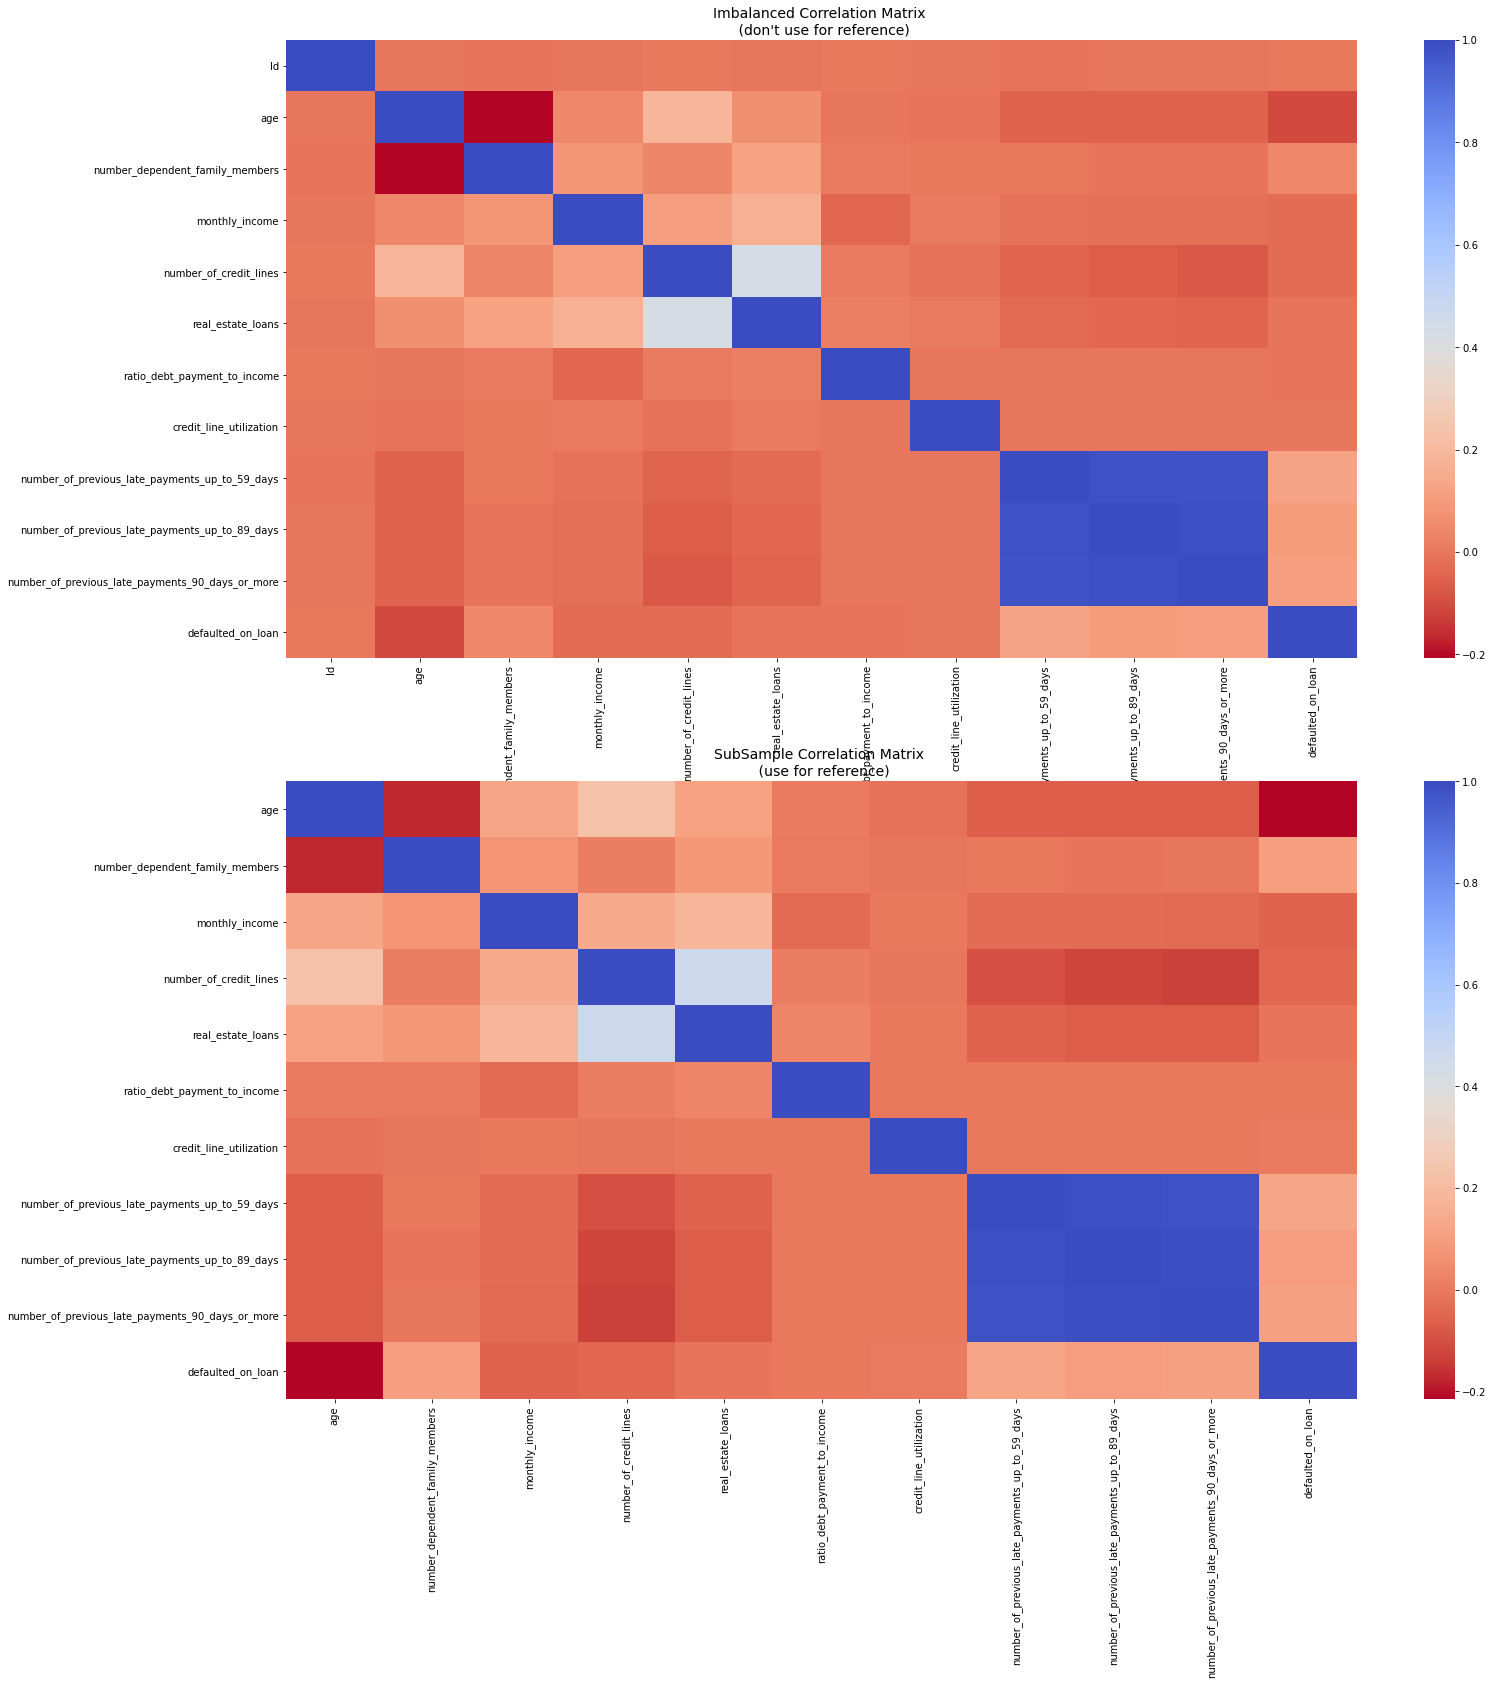

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,25))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

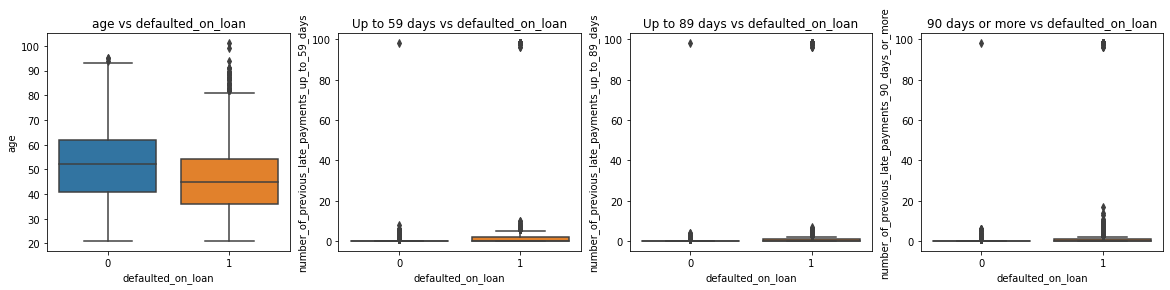

In [23]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))


sns.boxplot(x="defaulted_on_loan", y="age", data=new_df, ax=axes[0] )
axes[0].set_title('age vs defaulted_on_loan')

sns.boxplot(x="defaulted_on_loan", y="number_of_previous_late_payments_up_to_59_days", data=new_df, ax=axes[1] )
axes[1].set_title('Up to 59 days vs defaulted_on_loan')

sns.boxplot(x="defaulted_on_loan", y="number_of_previous_late_payments_up_to_89_days", data=new_df, ax=axes[2] )
axes[2].set_title('Up to 89 days vs defaulted_on_loan')

sns.boxplot(x="defaulted_on_loan", y="number_of_previous_late_payments_90_days_or_more", data=new_df, ax=axes[3] )
axes[3].set_title('90 days or more vs defaulted_on_loan')

plt.show()

In [24]:
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import matplotlib.patches as mpatches
from sklearn.decomposition import KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

## Now lets use dimensionality reduction on our data

In [25]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_rus.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_rus.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X_rus.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 5.4e+01 s
PCA took 0.049 s
Truncated SVD took 0.063 s


In [26]:
t0 = time.time()
X_reduced_pca_rbf = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04).fit_transform(X_rus.values)
t1 = time.time()
print("RBF took {:.2} s".format(t1 - t0))

t0 = time.time()
X_reduced_pca_sigmoid = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.04).fit_transform(X_rus.values)
t1 = time.time()
print("Sigmoid took {:.2} s".format(t1 - t0))

t0 = time.time()
X_reduced_isomap = Isomap(n_components=2).fit_transform(X_rus.values)
t1 = time.time()
print("Isomap took {:.2} s".format(t1 - t0))

RBF took 1.1e+01 s
Sigmoid took 6.0 s
Isomap took 3e+01 s


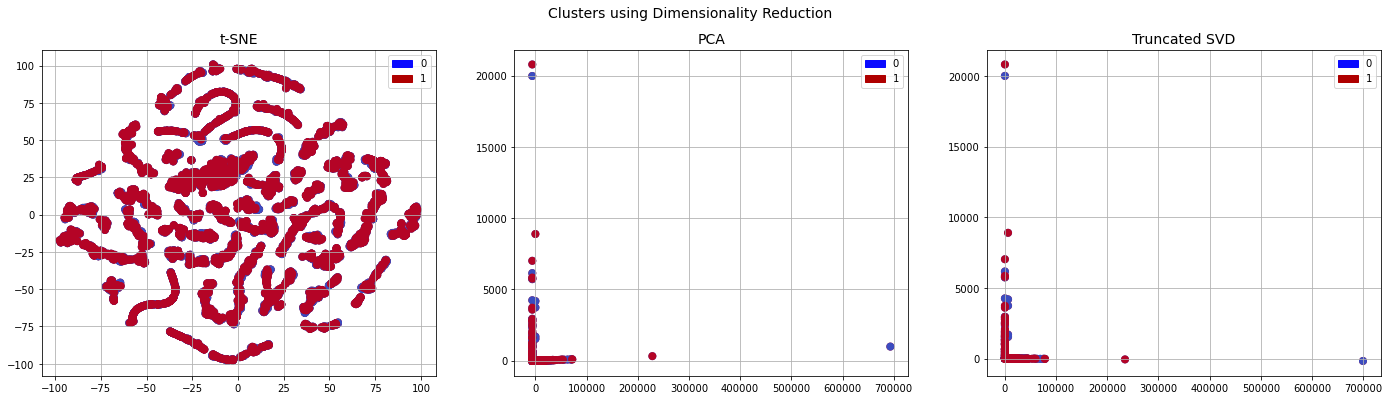

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='0')
red_patch = mpatches.Patch(color='#AF0000', label='1')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_rus == 0), cmap='coolwarm', label='0', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_rus == 1), cmap='coolwarm', label='1', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_rus == 0), cmap='coolwarm', label='0', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_rus == 1), cmap='coolwarm', label='1', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_rus == 0), cmap='coolwarm', label='0', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y_rus == 1), cmap='coolwarm', label='1', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

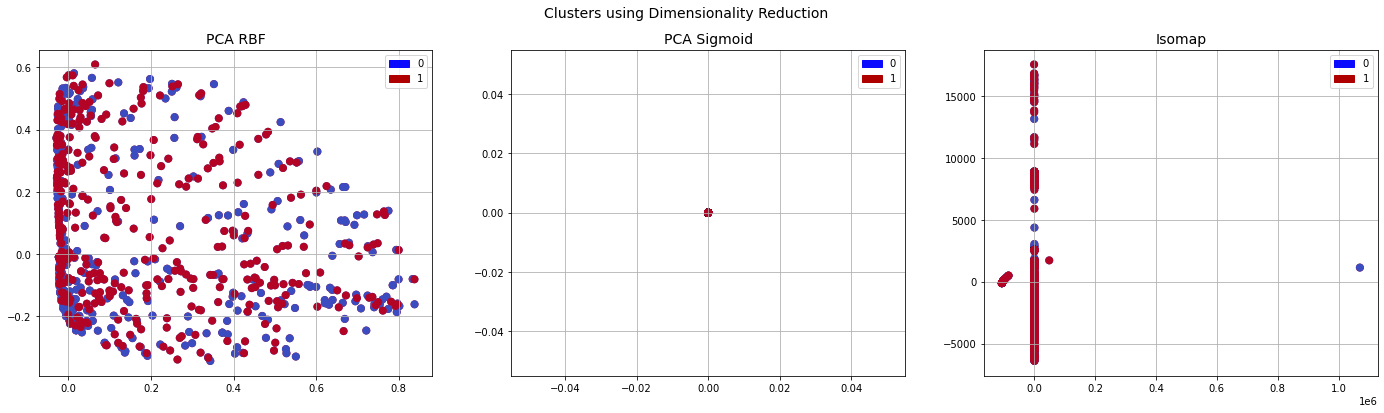

In [28]:
fi, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(24,6))
fi.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


ax4.scatter(X_reduced_pca_rbf[:,0], X_reduced_pca_rbf[:,1], c=(y_rus == 0), cmap='coolwarm', label='0', linewidths=2)
ax4.scatter(X_reduced_pca_rbf[:,0], X_reduced_pca_rbf[:,1], c=(y_rus == 1), cmap='coolwarm', label='1', linewidths=2)
ax4.set_title('PCA RBF', fontsize=14)

ax4.grid(True)

ax4.legend(handles=[blue_patch, red_patch])


ax5.scatter(X_reduced_pca_sigmoid[:,0], X_reduced_pca_sigmoid[:,1], c=(y_rus == 0), cmap='coolwarm', label='0', linewidths=2)
ax5.scatter(X_reduced_pca_sigmoid[:,0], X_reduced_pca_sigmoid[:,1], c=(y_rus == 1), cmap='coolwarm', label='1', linewidths=2)
ax5.set_title('PCA Sigmoid', fontsize=14)

ax5.grid(True)

ax5.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax6.scatter(X_reduced_isomap[:,0], X_reduced_isomap[:,1], c=(y_rus == 0), cmap='coolwarm', label='0', linewidths=2)
ax6.scatter(X_reduced_isomap[:,0], X_reduced_isomap[:,1], c=(y_rus == 1), cmap='coolwarm', label='1', linewidths=2)
ax6.set_title('Isomap', fontsize=14)

ax6.grid(True)

ax6.legend(handles=[blue_patch, red_patch])

plt.show()

### There are interesting results in PCA RBF, Isomap and Truncated SVD. We will definately try them in the prediction

<h3>Important thing to NOTE</h3>
<h3>I have tried different outlier detection and removal tehcniques(on my first EDA notebook) and unfortunately they don't work well with this data. It is better to keep this dataset as it is. So, I am not gonna spend time on them in this notebook</h3>


## Next thing I will do is compare different classification algorithms

In [29]:
classifiers = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "CatBoostClassifier": CatBoostClassifier(silent=True),
    "DecisionTreeClassifier": BaggingClassifier(DecisionTreeClassifier(), n_estimators=200)
}

In [30]:
sss = StratifiedKFold()
roc = []
def train(classifier):
    for train_idx, test_idx in sss.split(X_rus, y_rus):
        X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
        y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]

        pipe = Pipeline(steps=[
            ('preprocessing', ColumnTransformer(transformers=[
                ('numeric', Pipeline(steps=[
                    ('impute', SimpleImputer(strategy='median')),
                    ('scale', RobustScaler())
                ]), columns),
            ])),
            ('classifier', classifier)
        ])
        pipe.fit(X_train, y_train)
        y_predicted=pipe.predict_proba(X_test)
        roc.append(roc_auc_score(y_test, y_predicted[:, 1]))

    return np.mean(roc)

In [31]:
for key, classifier in classifiers.items():
    print(key,'accucary',train(classifier))

RandomForestClassifier accucary 0.8356770524203494
GradientBoostingClassifier accucary 0.842167822982834
CatBoostClassifier accucary 0.843662983324818
DecisionTreeClassifier accucary 0.8401515060720689


## Now lets try our dimensionality reduction techniques

In [32]:
sss = StratifiedKFold()
roc = []
def train_reduced(classifier, reducer):
    for train_idx, test_idx in sss.split(X_rus, y_rus):
        X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
        y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]

        pipe = Pipeline(steps=[
            ('preprocessing', ColumnTransformer(transformers=[
                ('numeric', Pipeline(steps=[
                    ('impute', SimpleImputer(strategy='mean')),
                    ('scale', RobustScaler())
                ]), columns),
            ])),
            ('reducing', reducer),
            ('classifier', classifier)
        ])
        pipe.fit(X_train, y_train)
        y_predicted=pipe.predict_proba(X_test)
        roc.append(roc_auc_score(y_test, y_predicted[:, 1]))

    return np.mean(roc)

In [33]:
reducers = {
    "PCA RBF": KernelPCA(n_components = 2, kernel="rbf"),
    "Isomap": Isomap(n_components=2,),
    "SVD":  TruncatedSVD(n_components=2, algorithm='randomized')
}

In [34]:
for red, reducer in reducers.items():
    for clas, classifier in classifiers.items():
        print(red, clas,'accucary',train_reduced(classifier, reducer))

PCA RBF RandomForestClassifier accucary 0.701604210498714
PCA RBF GradientBoostingClassifier accucary 0.7242737462444457
PCA RBF CatBoostClassifier accucary 0.7320930541020392
PCA RBF DecisionTreeClassifier accucary 0.723328853272978
Isomap RandomForestClassifier accucary 0.7136631426468928
Isomap GradientBoostingClassifier accucary 0.7119136844558666
Isomap CatBoostClassifier accucary 0.7125269863172634
Isomap DecisionTreeClassifier accucary 0.7077739086636783
SVD RandomForestClassifier accucary 0.7113772257452848
SVD GradientBoostingClassifier accucary 0.7187898368008038
SVD CatBoostClassifier accucary 0.7244534463214393
SVD DecisionTreeClassifier accucary 0.7256495498737706


### We had high hopes for dimensionality reduction that it will increase the accuracy, but it didn't

In [35]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("GradientBoostingClassifier Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("RandomForestClassifier Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("CatBoostClassifier Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

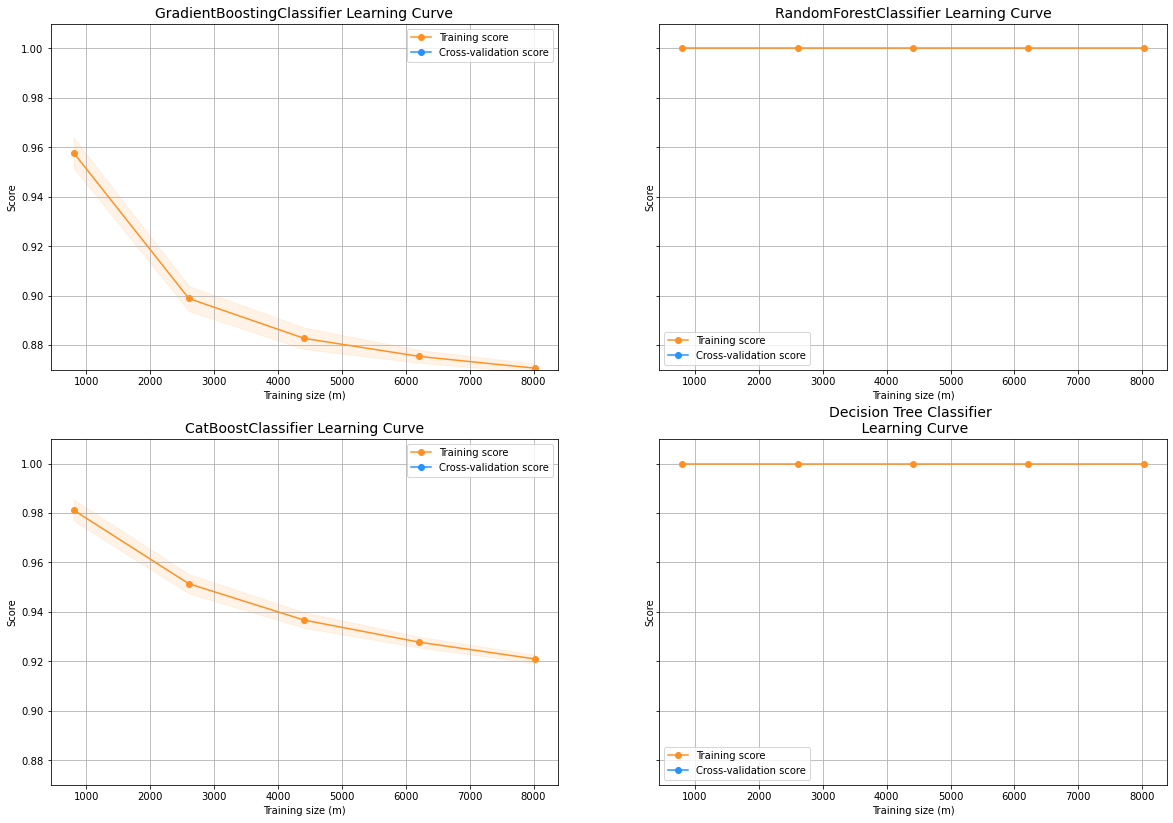

In [36]:
cvv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=42)
plot_learning_curve(GradientBoostingClassifier(), RandomForestClassifier(),
                    CatBoostClassifier(), BaggingClassifier(DecisionTreeClassifier(), n_estimators=200), 
                    X_rus, y_rus, (0.87, 1.01), cv=cvv, n_jobs=4)

In [37]:
from matplotlib import pyplot

Accuracy for GradientBoostingClassifier 0.8484569989392821


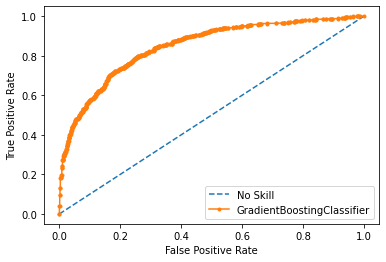

In [38]:
roc = []
lr = []
for train_idx, test_idx in sss.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    ns_probs = [0 for _ in range(len(y_test))]


    pipe1 = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='median')),
                ('scale', RobustScaler())
            ]), columns),
        ])),
        ('classifier', GradientBoostingClassifier())
    ])
    pipe1.fit(X_train, y_train)
    y_predicted=pipe1.predict_proba(X_test)
    roc.append(roc_auc_score(y_test, y_predicted[:, 1]))
    lr.append(roc_auc_score(y_test, ns_probs))
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:, 1])

print('Accuracy for GradientBoostingClassifier',np.mean(roc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predicted[:, 1])
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='GradientBoostingClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


Accuracy for CatBoostClassifier 0.846653304008786


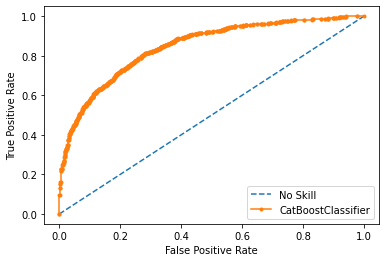

In [39]:
roc = []
lr = []
for train_idx, test_idx in sss.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    ns_probs = [0 for _ in range(len(y_test))]


    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='median')),
                ('scale', RobustScaler())
            ]), columns),
        ])),
        ('classifier', CatBoostClassifier(silent=True))
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict_proba(X_test)
    roc.append(roc_auc_score(y_test, y_predicted[:, 1]))
    lr.append(roc_auc_score(y_test, ns_probs))
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:, 1])

print('Accuracy for CatBoostClassifier',np.mean(roc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predicted[:, 1])
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='CatBoostClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


Accuracy for RandomForestClassifier 0.8376126224780762


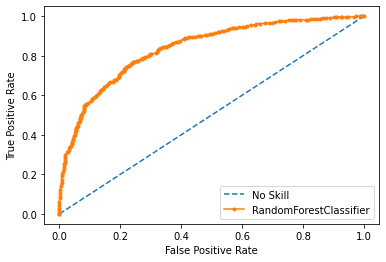

In [40]:
roc = []
lr = []
for train_idx, test_idx in sss.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    ns_probs = [0 for _ in range(len(y_test))]


    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='median')),
                ('scale', RobustScaler())
            ]), columns),
        ])),
        ('classifier', RandomForestClassifier(n_estimators=200))
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict_proba(X_test)
    roc.append(roc_auc_score(y_test, y_predicted[:, 1]))
    lr.append(roc_auc_score(y_test, ns_probs))
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:, 1])

print('Accuracy for RandomForestClassifier',np.mean(roc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predicted[:, 1])
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RandomForestClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


Accuracy for LGBMClassifier 0.8442158893555927


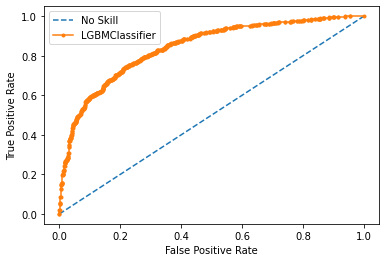

In [41]:
roc = []
lr = []
for train_idx, test_idx in sss.split(X_rus, y_rus):
    X_train, X_test = X_rus.iloc[train_idx], X_rus.iloc[test_idx]
    y_train, y_test = y_rus.iloc[train_idx], y_rus.iloc[test_idx]
    ns_probs = [0 for _ in range(len(y_test))]


    pipe = Pipeline(steps=[
        ('preprocessing', ColumnTransformer(transformers=[
            ('numeric', Pipeline(steps=[
                ('impute', SimpleImputer(strategy='median')),
                ('scale', RobustScaler())
            ]), columns),
        ])),
        ('classifier', LGBMClassifier())
    ])
    pipe.fit(X_train, y_train)
    y_predicted=pipe.predict_proba(X_test)
    roc.append(roc_auc_score(y_test, y_predicted[:, 1]))
    lr.append(roc_auc_score(y_test, ns_probs))
    fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:, 1])

print('Accuracy for LGBMClassifier',np.mean(roc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_predicted[:, 1])
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LGBMClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [42]:
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

In [43]:
perm = PermutationImportance(pipe1).fit(X_test, y_test)

In [44]:
show_weights(perm, feature_names=X.columns.tolist())

Weight,Feature
0.0637 ± 0.0181,credit_line_utilization
0.0619 ± 0.0103,number_of_previous_late_payments_90_days_or_more
0.0410 ± 0.0106,number_of_previous_late_payments_up_to_59_days
0.0371 ± 0.0057,number_of_previous_late_payments_up_to_89_days
0.0113 ± 0.0078,age
0.0063 ± 0.0021,number_of_credit_lines
0.0056 ± 0.0034,real_estate_loans
0.0050 ± 0.0082,ratio_debt_payment_to_income
0.0003 ± 0.0054,number_dependent_family_members
-0.0000 ± 0.0043,monthly_income


In [45]:
perm_train = PermutationImportance(pipe1).fit(X_train, y_train)
show_weights(perm_train, feature_names=X.columns.tolist())

Weight,Feature
0.0701 ± 0.0070,credit_line_utilization
0.0686 ± 0.0040,number_of_previous_late_payments_90_days_or_more
0.0389 ± 0.0037,number_of_previous_late_payments_up_to_89_days
0.0372 ± 0.0051,number_of_previous_late_payments_up_to_59_days
0.0117 ± 0.0053,age
0.0105 ± 0.0035,ratio_debt_payment_to_income
0.0087 ± 0.0026,number_of_credit_lines
0.0083 ± 0.0026,real_estate_loans
0.0058 ± 0.0023,monthly_income
0.0041 ± 0.0021,number_dependent_family_members


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus)

### Let's see our result on confusion matrix

<AxesSubplot:>

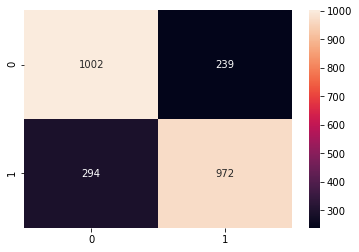

In [47]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred = pipe1.predict(X_test)

cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True,  fmt='g')